#Use a proper tensorflow version
Our model was build on TF2.14 and it does cause some compatibility issues with TF2.17 so make sure you use the right version

In [ ]:
#Check tf version
import tensorflow as tf
#print(tf.__version__)

#The following force you to use tensorflow 2.14 but you need to restart. You may comment it if you know you are using 2.14
##Make sure you down grade!! otherwise, some part will fail due to compatibility.
#!pip3 install --upgrade tensorflow==2.14.0
print(tf.__version__)

2.17.0


#Get the dataset

In [ ]:
# mount google drive on your runtime using and authorization code.
# more details here: https://colab.research.google.com/notebooks/io.ipynb
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Set directories correctly

In [ ]:
import os
# Path to the directory containing the project files (CHANGE THIS PATH TO THE DIRECTORY ON YOUR COMPUTER)
PROJECT_ROOT_DIR = os.getcwd() + '/'

# Path to the directory containing the dataset relative to project file
DATA_DIR = 'drive/My Drive/Colab Notebooks/GTSRB_dataset/GTSRB_dataset/'

#path to the directory you want to use for saving models relative to the project file
MODEL_DIR = 'drive/My Drive/Colab Notebooks/'

In [ ]:
# Funciton for loading the dataset
# Code from advml-traffic-sign (https://github.com/inspire-group/advml-traffic-sign)
def load_dataset_GTSRB(n_channel=3, train_file_name=None):
    """
    Load GTSRB data as a (datasize) x (channels) x (height) x (width) numpy
    matrix. Each pixel is rescaled to the range [0,1].
    """

    def load_pickled_data(file, columns):
        """
        Loads pickled training and test data.

        Parameters
        ----------
        file    : string
                          Name of the pickle file.
        columns : list of strings
                          List of columns in pickled data we're interested in.

        Returns
        -------
        A tuple of datasets for given columns.
        """

        with open(file, mode='rb') as f:
            dataset = pickle.load(f)
        return tuple(map(lambda c: dataset[c], columns))

    def preprocess(x, n_channel):
        """
        Preprocess dataset: turn images into grayscale if specified, normalize
        input space to [0,1], reshape array to appropriate shape for NN model
        """

        if n_channel == 3:
            # Scale features to be in [0, 1]
            x = (x / 255.).astype(np.float32)
        else:
            # Convert to grayscale, e.g. single Y channel
            x = 0.299 * x[:, :, :, 0] + 0.587 * x[:, :, :, 1] + \
                0.114 * x[:, :, :, 2]
            # Scale features to be in [0, 1]
            x = (x / 255.).astype(np.float32)
            x = x[:, :, :, np.newaxis]
        return x

    # Load pickle dataset
    if train_file_name is None:
        x_train, y_train = load_pickled_data(
            PROJECT_ROOT_DIR + DATA_DIR + 'train.p', ['features', 'labels'])
    else:
        x_train, y_train = load_pickled_data(
            PROJECT_ROOT_DIR + DATA_DIR + train_file_name, ['features', 'labels'])
    x_val, y_val = load_pickled_data(
        PROJECT_ROOT_DIR + DATA_DIR + 'valid.p', ['features', 'labels'])
    x_test, y_test = load_pickled_data(
        PROJECT_ROOT_DIR + DATA_DIR + 'test.p', ['features', 'labels'])

    # Preprocess loaded data
    x_train = preprocess(x_train, n_channel)
    x_val = preprocess(x_val, n_channel)
    x_test = preprocess(x_test, n_channel)
    return x_train, y_train, x_val, y_val, x_test, y_test

In [ ]:
import pickle
import numpy as np
# Load the images and labels. These images are RGB so we have 3 channels
imgs_train, labels_train, imgs_val, labels_val, imgs_test, labels_test = load_dataset_GTSRB(n_channel=3)

#Load the built model from Assignment 1 (Already on blackboard)

In [ ]:
## Load the saved the model
from tensorflow.keras.models import load_model



#load our already trained model
# Your earlier directories should change to match this one
#You should be able to load the model once trained. The following line is used for that.
model = load_model(MODEL_DIR +'VGG_best(1).h5')

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


#Some constants that you might need
It is not neccessary that you will use all

In [ ]:
# Set constants (GTSRB)
NUM_LABELS = 43                             # Number of labels or classes for classification
BATCH_SIZE = 128                            # Size of batch
HEIGHT = 32                                 # Height of input image
WIDTH = 32                                  # Width of input image
N_CHANNEL = 3                               # Number of channels
OUTPUT_DIM = 43                             # Number of output dimension

# Set training hyperparameters
NUM_EPOCH = 50                            # Number of epoch to train
LR = 0.0002                                 # Learning rate
RBW = True #restore best weights
PATIENCE = 5# how many epochs between improvements
sample_size = 100
alpha = 0.001
INPUT_SHAPE = (HEIGHT, WIDTH, N_CHANNEL)  # Input shape of model
IMG_SHAPE = (HEIGHT, WIDTH, N_CHANNEL)

# setting up labels

In [ ]:

from tensorflow.keras.utils import to_categorical

#Convert the labels to one-hot encoding (to input to the models)

#Use the following sub-test dataset for your certified training
imgs_sub_test = imgs_test[0:500,:,:,:].copy()
labels_adv = labels_test[0:500].copy()




labels_train_cat = to_categorical(labels_train, NUM_LABELS)
labels_test_cat = to_categorical(labels_test, NUM_LABELS)
labels_val_cat = to_categorical(labels_val, NUM_LABELS)

#for testing adversarial inputs
labels_adv_cat = to_categorical(labels_adv,NUM_LABELS)

print('Labels train shape: {}'.format(labels_train.shape))
print('Labels train catagorical shape: {}\n'.format(labels_train_cat.shape))
print('Labels Adver shape: {}'.format(labels_adv.shape))
print('Labels Adver catagorical shape: {}'.format(labels_adv_cat.shape))

print('Imgs Adver shape: {}'.format(imgs_sub_test.shape))

Labels train shape: (34799,)
Labels train catagorical shape: (34799, 43)

Labels Adver shape: (500,)
Labels Adver catagorical shape: (500, 43)
Imgs Adver shape: (500, 32, 32, 3)


#Install ART if needed

In [ ]:
#Install ART
!pip install adversarial-robustness-toolbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.6 MB/s eta 0:00:00


#Some imports.
You might need more

In [ ]:
from art.estimators.classification import TensorFlowV2Classifier
from art.estimators.certification.randomized_smoothing import TensorFlowV2RandomizedSmoothing
from art.utils import compute_accuracy
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import binomtest

In [ ]:
!pip install scipy==1.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 92.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.20 requires scipy>=1.10.0, but you have scipy 1.8.0 which is incompatible.
arviz 0.20.0 requires scipy>=1.9.0, but you have scipy 1.8.0 which is incompatible.
jax 0.4.33 requires scipy>=1.10, but you have scipy 1.8.0 which is incompatible.
jaxlib 0.4.33 requires scipy>=1.10, but you have scipy 1.8.0 which is incompatible.
scikit-image 0.24.0 re

###Part 1

##Task 1
Our first task with implement randomized smoothing for the VGG model from last time. Your task is to download the model and use Adversarial Robustness Toolbox (ART) to implement randomized smoothing to certify the model. [This notebook](https://github.com/Trusted-AI/adversarial-robustness-toolbox/blob/main/notebooks/output_randomized_smoothing_mnist.ipynb) should be your guide to implementing the task. You will use σ^2=[ 0.25,0.5,1] as Gaussian noise parameter. Once needed, use 100 as the number of samples to estimate the certifiable radius. You will find the standard and certified accuracy for different noises. You will also plot the L2 radius versus certified accuracy.

#Notes:
Training will take time to generate the results. Try it first with only 2 training rounds and then increase to 25. Certification for all the testing will take forever. Thus, whenever you need a testing set, use a subset of the testing samples, not all. We already provided that subset for you in a variable that you must look for.


In [ ]:
def getCertAcc(radius, pred, y_test):

    rad_list = np.linspace(0, 2.25, 201)
    cert_acc = []
    num_cert = len(radius)

    for r in rad_list:
        rad_idx = np.where(radius >= r)[0]
        y_test_subset = y_test[rad_idx]
        cert_acc.append(np.sum(pred[rad_idx] == np.argmax(y_test_subset, axis=1)) / num_cert)

    return cert_acc
alpha=0.001
sample_size=100

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
# Original Classifier - Non Smoothed Classifier
classifier = TensorFlowV2Classifier(model=model,
                                    nb_classes=NUM_LABELS,
                                    input_shape=INPUT_SHAPE,
                                    loss_object=loss_object,
                                    optimizer=optimizer,
                                    channels_first=False,
                                    clip_values=(0,1))
classifier.fit(imgs_train, labels_train, nb_epochs=NUM_EPOCH, batch_size=BATCH_SIZE,verbose=1)
classifier_0 = TensorFlowV2RandomizedSmoothing(model=classifier.model,
                                    nb_classes=NUM_LABELS,
                                    input_shape=INPUT_SHAPE,
                                    loss_object=loss_object,
                                    optimizer=optimizer,
                                    channels_first=False,
                                    clip_values=(0,1),
                                    sample_size=sample_size,
                                    scale=0.5,
                                    alpha=alpha)
classifier_0.fit(imgs_train, labels_train, nb_epochs=NUM_EPOCH, batch_size=BATCH_SIZE,verbose=1)
x_preds_0 = classifier_0.predict(imgs_sub_test,n=500)
accuracy_0, coverage_0 = compute_accuracy(x_preds_0, labels_adv_cat)
prediction_0, radius_0 = classifier_0.certify(imgs_sub_test,n=500)
certified_accuracy_0=getCertAcc(radius_0, prediction_0,labels_adv_cat)
print("At sigma = 0") #Wrongly written it should be at 0.5 - for Original Classifier
print("Accuracy: {}".format(accuracy_0))
print("Coverage: {}".format(coverage_0))
print("L2 Radius: {}".format(radius_0))
print("Certified Accuracy: {}".format(certified_accuracy_0))
print("Mean of L2 Radius: {}".format(np.mean(radius_0)))
print("Mean of Certified Accuracy: {}".format(np.mean(certified_accuracy_0)))

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

At sigma = 0
Accuracy: 0.7557471264367817
Coverage: 0.696
L2 Radius: [1.04492605 0.90152725 1.10259312 1.10259312 0.39264013 1.10259312
 1.10259312 0.64074489 1.10259312 1.10259312 0.12931294 0.25746984
 0.         0.52271263 0.         0.         0.03291613 0.
 0.         1.10259312 0.         1.10259312 0.         0.19272129
 0.         0.92239186 0.73983904 0.06622418 0.35594531 1.00466038
 0.60731177 1.04492605 1.10259312 0.         1.04492605 1.10259312
 0.26361597 0.23038919 1.10259312 0.         0.         0.
 0.71171599 0.         0.05079256 0.40028787 0.23038919 0.31145645
 0.         0.         0.         1.10259312 0.         0.60731177
 0.61373431 0.08698643 0.         0.08959854 0.08959854 0.
 0.39264013 0.         0.07139346 0.         0.         1.10259312
 0.54346159 0.23335425 0.59481852 0.         0.78263291 0.02275334
 0.         0.         0.         0.46613126 0.20414774 0.06622418
 0.65514878 0.52779776 0.62696157 0.17025418 0.11064756 0.43620666
 0.28872355 0.301

In [ ]:
# At sigma = 0.25
classifier_1 = TensorFlowV2RandomizedSmoothing(model=model,
                                    nb_classes=NUM_LABELS,
                                    input_shape=INPUT_SHAPE,
                                    loss_object=loss_object,
                                    optimizer=optimizer,
                                    channels_first=False,
                                    clip_values=(0,1),
                                    sample_size=sample_size,
                                    scale=0.25,
                                    alpha=alpha)
classifier_1.fit(imgs_train, labels_train, nb_epochs=NUM_EPOCH, batch_size=BATCH_SIZE,verbose=1)
x_preds_1 = classifier_1.predict(imgs_sub_test,n=500)
accuracy_1, coverage_1 = compute_accuracy(x_preds_1, labels_adv_cat)
prediction_1, radius_1 = classifier_1.certify(imgs_sub_test,n=500)
certified_accuracy_1=getCertAcc(radius_1,prediction_1,labels_adv_cat)
print("At sigma = 0.25")
print("Accuracy: {}".format(accuracy_1))
print("Coverage: {}".format(coverage_1))
print("L2 Radius: {}".format(radius_1))
print("Certified Accuracy: {}".format(certified_accuracy_1))
print("Mean of L2 Radius: {}".format(np.mean(radius_1)))
print("Mean of Certified Accuracy: {}".format(np.mean(certified_accuracy_1)))

  0%|          | 0/50 [00:00<?, ?it/s]

At sigma = 0.25
Accuracy: 0.882051282051282
Coverage: 0.78
L2 Radius: [0.55129656 0.55129656 0.55129656 0.55129656 0.52246302 0.55129656
 0.55129656 0.3390453  0.55129656 0.55129656 0.20796639 0.34307085
 0.02028109 0.0823557  0.3801777  0.37494922 0.         0.38562545
 0.30365589 0.55129656 0.         0.55129656 0.         0.15738418
 0.39727907 0.55129656 0.52246302 0.40354722 0.55129656 0.55129656
 0.21197087 0.55129656 0.55129656 0.         0.55129656 0.55129656
 0.         0.55129656 0.55129656 0.         0.05797769 0.
 0.52246302 0.01010893 0.         0.55129656 0.10495664 0.45076363
 0.         0.         0.         0.55129656 0.52246302 0.52246302
 0.55129656 0.09211915 0.         0.05930832 0.45076363 0.43265864
 0.45076363 0.29436848 0.41717384 0.05004403 0.31688997 0.55129656
 0.25149575 0.23528568 0.3801777  0.         0.55129656 0.23086741
 0.         0.07412227 0.05136057 0.47290577 0.         0.03569673
 0.55129656 0.55129656 0.52246302 0.52246302 0.16072183 0.
 0.48635

In [ ]:
# At sigma = 0.5
classifier_2 = TensorFlowV2RandomizedSmoothing(model=model,
                                    nb_classes=NUM_LABELS,
                                    input_shape=INPUT_SHAPE,
                                    loss_object=loss_object,
                                    optimizer=optimizer,
                                    channels_first=False,
                                    clip_values=(0,1),
                                    sample_size=sample_size,
                                    scale=0.5,
                                    alpha=alpha)
classifier_2.fit(imgs_train, labels_train, nb_epochs=NUM_EPOCH, batch_size=BATCH_SIZE,verbose=1)
x_preds_2 = classifier_2.predict(imgs_sub_test,n=500)
accuracy_2, coverage_2 = compute_accuracy(x_preds_2, labels_adv_cat)
prediction_2, radius_2 = classifier_2.certify(imgs_sub_test,n=500)
certified_accuracy_2=getCertAcc(radius_2,prediction_2,labels_adv_cat)
print("At sigma = 0.5")
print("Accuracy: {}".format(accuracy_2))
print("Coverage: {}".format(coverage_2))
print("L2 Radius: {}".format(radius_2))
print("Certified Accuracy: {}".format(certified_accuracy_2))
print("Mean of L2 Radius: {}".format(np.mean(radius_2)))
print("Mean of Certified Accuracy: {}".format(np.mean(certified_accuracy_2)))

  0%|          | 0/50 [00:00<?, ?it/s]

At sigma = 0.5
Accuracy: 0.8338192419825073
Coverage: 0.686
L2 Radius: [1.10259312 0.74989844 1.10259312 1.10259312 0.31476836 1.10259312
 1.10259312 0.16195041 1.10259312 1.10259312 0.16195041 0.29514129
 0.         0.         0.         0.09221467 0.49820586 0.
 0.         1.04492605 0.         1.10259312 0.         0.
 0.0050437  0.94581153 0.72077651 0.21863053 0.63377995 0.6780906
 0.15370754 1.04492605 1.10259312 0.         1.00466038 1.10259312
 0.         0.61373431 1.10259312 0.         0.         0.
 0.42394174 0.         0.         0.35950826 0.02783041 0.37766742
 0.         0.04311581 0.         1.10259312 0.06622418 0.92239186
 0.97270355 0.26053672 0.         0.20991328 0.20991328 0.
 0.26053672 0.16195041 0.1564486  0.         0.         1.10259312
 0.27293021 0.         0.         0.32480774 0.44879522 0.10008806
 0.         0.01009485 0.08698643 0.57109504 0.09745934 0.27293021
 0.57109504 0.31476836 0.40028787 0.         0.15370754 0.
 0.46613126 0.         0.       

In [ ]:
# At sigma = 1
classifier_3 = TensorFlowV2RandomizedSmoothing(model=model,
                                    nb_classes=NUM_LABELS,
                                    input_shape=INPUT_SHAPE,
                                    loss_object=loss_object,
                                    optimizer=optimizer,
                                    channels_first=False,
                                    clip_values=(0,1),
                                    sample_size=sample_size,
                                    scale=1,
                                    alpha=alpha)
classifier_3.fit(imgs_train, labels_train, nb_epochs=NUM_EPOCH, batch_size=BATCH_SIZE,verbose=1)
x_preds_3 = classifier_3.predict(imgs_sub_test,n=500)
accuracy_3, coverage_3 = compute_accuracy(x_preds_3, labels_adv_cat)
prediction_3, radius_3 = classifier_3.certify(imgs_sub_test,n=500)
certified_accuracy_3=getCertAcc(radius_3,prediction_3,labels_adv_cat)
print("At sigma = 1")
print("Accuracy: {}".format(accuracy_3))
print("Coverage: {}".format(coverage_3))
print("L2 Radius: {}".format(radius_3))
print("Certified Accuracy: {}".format(certified_accuracy_3))
print("Mean of L2 Radius: {}".format(np.mean(radius_3)))
print("Mean of Certified Accuracy: {}".format(np.mean(certified_accuracy_3)))

  0%|          | 0/50 [00:00<?, ?it/s]

At sigma = 1
Accuracy: 0.45317220543806647
Coverage: 0.662
L2 Radius: [0.92346963 1.84478371 2.20518623 0.68381424 0.05566081 1.37228339
 0.38544257 0.         1.22746862 0.25862587 0.         0.13761428
 0.3911304  1.69858357 0.73340304 0.         0.08623161 0.71189061
 0.53341562 0.74797591 0.         1.16551767 0.         0.41982657
 1.46028387 0.         0.         0.         0.         0.
 0.60323947 1.42343198 1.17747392 0.54586042 1.21462354 1.89162306
 0.         0.         0.         0.20017611 0.04550667 0.13244836
 0.         0.15315298 0.28019221 0.04550667 0.         0.
 0.         0.         0.         1.64064793 0.2693865  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.5088302  0.27478361 0.         0.96833381
 0.75533484 0.         0.50274459 0.03536871 0.         0.35165102
 0.23723327 0.         0.         0.3128972  0.50274459 0.
 0.33495858 0.         0.         0.34607243 0.34050837 1.09765534
 0.         0.         0.       

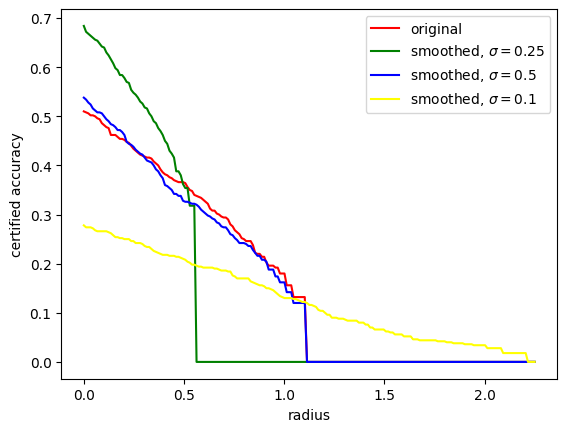

In [ ]:
rad_list = np.linspace(0, 2.25, 201)
plt.plot(rad_list, certified_accuracy_0, label='original',color='red')
plt.plot(rad_list, certified_accuracy_1, label='smoothed, $\sigma=$'+str(0.25),color='green')
plt.plot(rad_list, certified_accuracy_2, label='smoothed, $\sigma=$'+str(0.5),color='blue')
plt.plot(rad_list, certified_accuracy_3, label='smoothed, $\sigma=$'+str(0.1),color='yellow')
plt.xlabel('radius')
plt.ylabel('certified accuracy')
plt.legend()
plt.show()